# Iris ML example 

#### steps for supervised machine learning for dummy data set Iris data 
#### inside the SK learn

* in 1936 edger andreson collect 150 sample for the 3 speices of the Iris flower ( Iris setosa , Iris versicolor , Iris virginica) 

* 50 sample for each species with total 150 sample 

* framed as supervised learning prblem : will predict the species of an iris using the measurement.

* since this data is famus i will call it from datasets module inside the Sklearn 

In [1]:
# imprt load_iris function from the datasets module
from sklearn.datasets import load_iris # 
from sklearn.datasets import load_breast_cancer #

In [39]:
iris = load_iris()

In [42]:
print(iris['DESCR'], sep='\n')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### Machine Learning terminology for Supervised
* **Each row** is an observation (also known as: sample, example, instance, record)
* **Each column** is a feature (also known as: predictor, attribute, **independent variable**, input, regressor, covariate)
* **Each value we are predicting** is the **response** (also known as: target, outcome, label, **dependent variable**)
* **Classification** is supervised learning in which the response is categorical
* **Regression** is supervised learning in which the response is ordered and continuous


#### Requirements for working with data in scikit-learn

1. Features and response are **separate objects**
2. Features should always be **numeric**, and response should be **numeric** for regression problems
3. Features and response should be **NumPy arrays**
4. Features and response should have **specific shapes**

#### K-nearest neighbors (KNN) classification
1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

##### Example for training data

![dataset](knn\04_knn_dataset.png)

#### KNN classification map (k=1)

![Downloads](knn\04_1nn_map.png)

#### KNN classification map (k=5)

![Downloads](knn\04_5nn_map.png)

In [52]:
print(iris.data[0:10]) # head (10 records from data I slice it to see the data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [48]:
print(iris.feature_names) # feature column name , indepndent variable or predictor 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [49]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [51]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## scikit-learn 4-step modeling pattern


## KNN=1

**Step 1:** Import the class you plan to use



In [54]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

* "Estimator" is scikit-learn's term for model
* "Instantiate" means "make an instance of"
* Name of the object does not matter
* Can specify tuning parameters (aka "hyperparameters") during this step
* All parameters not specified are set to their defaults

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Step 3:** Fit the model with data (knn "model training")

Model is learning the relationship between X and y
Occurs in-place

In [67]:
x = iris.data
y = iris.target

knn.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

**Step 4:** Predict the response for a new observation

* New observations are called "out-of-sample" data
* Uses the information it learned during the model training process
* Returns a NumPy array
* Can predict for multiple observations at once

In [68]:
knn.predict([[4,3,2,1]])

C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [69]:
x_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(x_new)

C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 1])

## Knn=5 

In [70]:
# import the class
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model 
knn.fit(x,y)

# predict the new

knn.predict(x_new)

C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1])

## Using logic regression model

In [71]:
# import the class 
from sklearn.linear_model import LogisticRegression

#instantiate the model 
logreg = LogisticRegression(solver='liblinear')

# fit the model 
logreg.fit(x,y)

#predict response from new_observation or unseen data 
logreg.predict(x_new)

array([2, 0])

# repeat the task with testing the same predicted data 
**Agenda**
* How do I choose which model to use for my supervised learning task?
* How do I choose the best tuning parameters for that model?
* How do I estimate the likely performance of my model on out-of-sample data?

# load data 

In [72]:
# read the data again 
from sklearn.datasets import load_iris
iris = load_iris()
# create x features , y response
x = iris.data
y = iris.target

### logistic regression 

In [73]:
# import the class 
from sklearn.linear_model import LogisticRegression
# instantiate the model 
logreg = LogisticRegression(solver='liblinear')
# fit the model
logreg.fit(x,y)
# prredict the response from x value 
y_pred = logreg.predict(x)

In [74]:
# compute classification accuracy for the logistic regression model 
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.96


## KNN = 5

In [75]:
# import the class 
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model 
knn = KNeighborsClassifier(n_neighbors=5)
# fit the model
knn.fit(x,y)
# prredict the response from x value 
y_pred = knn.predict(x)
# compute the accuracy
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## KNN= 1

In [76]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
y_pred = knn.predict(x)
print(metrics.accuracy_score(y,y_pred))

1.0


C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## What is the problem with the above method ??? (overfitting) 

Overfitting occurs when a model **memorizes the training data too closely**, including noise and irrelevant details. This leads to **high performance on the training data** but poor performance on **unseen data**. It's like studying only past exam questions without understanding the concepts, resulting in failure on new 

![overfitting](knn\05_overfitting.png)

## Evaluation procedure #2: Train/test split
1. Split the dataset into two pieces: a training set and a testing set.
2. Train the model on the training set.
3. Test the model on the testing set, and evaluate how well we did.

![tts](knn\05_train_test_split.png)

In [81]:
# call the train test split from the model selection and split test and train dat 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.4, random_state=4) # Split will always be the same if you run this code again with random_state=4


In [84]:
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(150, 4)
(150,)
(90, 4)
(90,)
(60, 4)
(60,)


##### Logestic regresion 

In [88]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


### Knn = 5

In [89]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Knn=1 

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# I neeed to locate better value for KNN module 
how to achive that ? 

In [91]:
# try from k= 1 to k = 25 
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

Text(0, 0.5, 'testing accuracy sc')

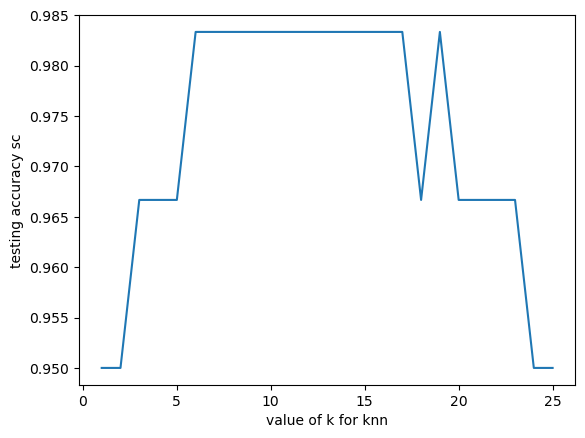

In [96]:
# let's see the result on graph
import matplotlib.pyplot as plt 
%matplotlib inline

plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('testing accuracy sc')

* **K value :** is > .98 from k = 6 to k = 17


In [97]:
print(scores)

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


In [100]:
# choose the midlle value for k and use it in the knn module 
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x,y)
knn.predict([[3,5,4,2]])

C:\Users\fouad-ameena\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])